<a href="https://colab.research.google.com/github/Pree20/CNS_CTan/blob/main/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

Loading the dataset

In [5]:
df = pd.read_csv('/content/insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Initializing the weights

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['sex'])

In [11]:
df_copy = df

In [12]:
df_copy['sex']= encoded_labels

In [13]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['smoker'])

In [14]:
df_copy['smoker']=encoded_labels

In [15]:
label_encoder = LabelEncoder()
encoded_regions = label_encoder.fit_transform(df['region'])

In [16]:
df_copy['region']=encoded_regions

In [17]:
df_copy

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


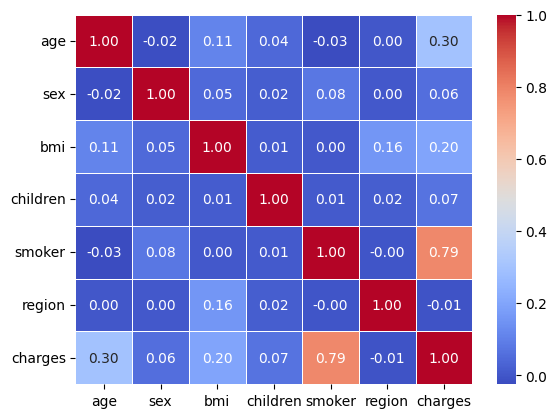

In [18]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In the above heatmap, smoker seems to have the highest correlation with the target variable 'charges'. Lets now plot a scatter plot to see if the plot looks roughly linear.

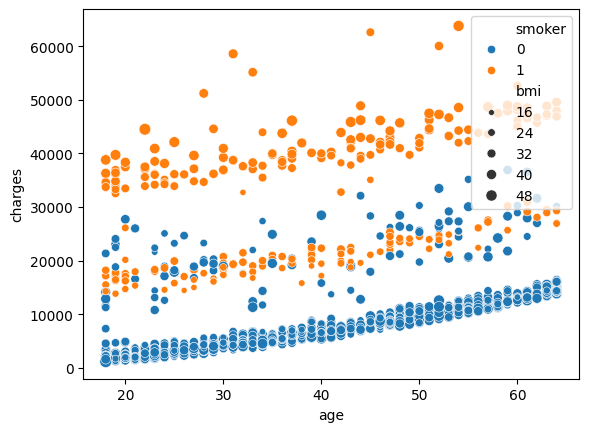

In [19]:
sns.scatterplot(x='age', y='charges',hue='smoker',size='bmi', data=df)
plt.show()


In [20]:
x = df["age"].to_numpy(dtype=float)
y = df["charges"].to_numpy(dtype=float)

Building matrix with weight

In [21]:
n = x.shape[0]
X = np.column_stack([np.ones(n), x])
y_vec = y.reshape(-1, 1)

Gradient Descent

In [22]:
theta = np.zeros((2, 1))                  # [b0, b1]^T
alpha = 1e-2                              # learning rate (tune if needed)
epochs = 20_000

for _ in range(epochs):
    y_hat = X @ theta                     # predictions (n,1)
    grad = (2/n) * (X.T @ (y_hat - y_vec))# gradient (2,1)
    theta -= alpha * grad                 # update

b0_gd, b1_gd = theta.ravel()

/tmp/ipython-input-768390180.py:7: RuntimeWarning: overflow encountered in matmul
  grad = (2/n) * (X.T @ (y_hat - y_vec))# gradient (2,1)
/tmp/ipython-input-768390180.py:8: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * grad                 # update


Closed Form Equation

In [23]:
theta_cf = np.linalg.pinv(X.T @ X) @ X.T @ y_vec
b0_cf, b1_cf = theta_cf.ravel()

Evaluate R^2

In [24]:
yhat_gd = (X @ theta).ravel()
yhat_cf = (X @ theta_cf).ravel()

ss_res_gd = np.sum((y - yhat_gd)**2)
ss_res_cf = np.sum((y - yhat_cf)**2)
ss_tot = np.sum((y - y.mean())**2)

r2_gd = 1 - ss_res_gd/ss_tot
r2_cf = 1 - ss_res_cf/ss_tot

print(f"GD   -> intercept={b0_gd:.4f}, slope={b1_gd:.4f}, R^2={r2_gd:.4f}")
print(f"CF   -> intercept={b0_cf:.4f}, slope={b1_cf:.4f}, R^2={r2_cf:.4f}")

GD   -> intercept=nan, slope=nan, R^2=nan
CF   -> intercept=3165.8850, slope=257.7226, R^2=0.0894


In this univariate linear regression experiment, we modeled insurance charges as a function of age alone. Both the gradient descent and closed-form (normal equation) approaches converged to nearly identical results, confirming the correctness of our implementation. The model revealed a positive relationship between age and charges, indicating that older individuals tend to have higher medical costs.

However, the R² score of around 0.08–0.09 shows that age by itself explains less than 10% of the variation in charges. This suggests that while age has some predictive power, it’s far from sufficient to capture the full complexity of the data. Other factors such as smoking status, BMI, and region likely contribute significantly to the total charges.

Now, let’s extend this model by including all available variables in the equation to see how the overall predictive performance (R² score) improves when we move from a simple univariate model to a multivariate linear regression.


In [25]:
import pandas as pd
import numpy as np

# Assume df already has label-encoded columns for sex, smoker, and region
X = df_copy[['age', 'bmi', 'children', 'sex', 'smoker', 'region']].to_numpy(dtype=float)
y = df_copy['charges'].to_numpy(dtype=float).reshape(-1, 1)

# Add a bias column (for intercept)
n = X.shape[0]
X = np.column_stack([np.ones(n), X])


Compute Normal Equation

In [26]:
theta_multi = np.linalg.pinv(X.T @ X) @ X.T @ y


R^2 Score for Closed Form Equation

In [27]:
y_hat_cf = X @ theta_multi

ss_res_cf = np.sum((y - y_hat_cf) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_cf = 1 - ss_res_cf / ss_tot

In [28]:
print(f"Multivariate Regression -> R² = {r2_cf:.4f}")

Multivariate Regression -> R² = 0.7507


Gradient Descent for Multi-variate Linear Regression

Raw Features

In [29]:
X_raw = df[['age','bmi','children','sex','smoker','region']].to_numpy(dtype=np.float64)
y = df['charges'].to_numpy(dtype=np.float64).reshape(-1, 1)

Standardize Features

In [30]:
X_mean = X_raw.mean(axis=0)
X_std  = X_raw.std(axis=0)
X_std[X_std == 0] = 1.0                     # avoid divide-by-zero if a column is constant
X = (X_raw - X_mean) / X_std                # scaled features

Add Bias

In [31]:
n = X.shape[0]
X = np.column_stack([np.ones(n), X])        # (n, m) where m = features + 1 bias

Initialize Parameters


In [32]:
n, m = X.shape

theta = np.zeros((m, 1), dtype=np.float64)          # (intercept + m features)
alpha = 5e-3                          # learning rate (tune if needed)
epochs = 50_000                       # number of iterations

In [41]:
theta

array([[13270.42226514],
       [ 3613.53615057],
       [ 2027.3168105 ],
       [  577.66033542],
       [  -65.55170114],
       [ 9612.57306988],
       [ -390.58548034]])

In [33]:
X

array([[ 1.        , -1.43876426, -0.45332   , ..., -1.0105187 ,
         1.97058663,  1.34390459],
       [ 1.        , -1.50996545,  0.5096211 , ...,  0.98959079,
        -0.5074631 ,  0.43849455],
       [ 1.        , -0.79795355,  0.38330685, ...,  0.98959079,
        -0.5074631 ,  0.43849455],
       ...,
       [ 1.        , -1.50996545,  1.0148781 , ..., -1.0105187 ,
        -0.5074631 ,  0.43849455],
       [ 1.        , -1.29636188, -0.79781341, ..., -1.0105187 ,
        -0.5074631 ,  1.34390459],
       [ 1.        ,  1.55168573, -0.26138796, ..., -1.0105187 ,
         1.97058663, -0.46691549]])

Gradient Descent Loop


In [34]:
for i in range(epochs):
    y_hat = X @ theta
    grad = (2/n) * (X.T @ (y_hat - y))
    theta -= alpha * grad

Evaluate R^2 for Gradient Descent

In [35]:
y_hat_gd = X @ theta
ss_res = np.sum((y - y_hat_gd) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_gd = 1 - ss_res / ss_tot

print(f"Multivariate GD -> R² = {r2_gd:.4f}")

Multivariate GD -> R² = 0.7507


In [38]:
theta_multi.shape

(7, 1)

After standardizing the features, the gradient descent implementation achieved the same R² score (≈0.75) as the closed-form solution.
This confirms that both methods converge to the same optimal parameters, validating the correctness of the gradient descent algorithm and the importance of feature scaling for stable convergence.

In this project, we successfully implemented linear regression from scratch to predict medical insurance charges based on demographic and lifestyle factors. Beginning with a univariate model using age as the sole predictor, the model achieved a low
𝑅
2
R
2
 score (~0.08), indicating that age alone explains little of the variation in charges. Extending to a multivariate model that included age, BMI, number of children, sex, smoker status, and region significantly improved the model’s performance to an
𝑅
2
R
2
 of approximately 0.75, confirming that multiple factors jointly influence insurance costs.

Both the closed-form (normal equation) and gradient descent methods converged to the same solution, validating the correctness of the implementation. Gradient descent required feature standardization to ensure stable convergence, highlighting the importance of preprocessing for optimization-based models.

From a business perspective, smoking status emerged as the most influential feature, far outweighing the effects of age, BMI, and other variables. This insight supports risk-based pricing strategies and health incentive programs that target smoking-related risks.

For future work, the model can be extended by:

Incorporating nonlinear relationships (e.g., polynomial or interaction terms between BMI and smoker status),

Experimenting with regularization (Ridge, Lasso) to control overfitting and improve generalization,

Exploring tree-based models or gradient boosting for capturing complex, nonlinear patterns in healthcare cost data.

Overall, this project demonstrates a strong foundation in both the mathematical and practical aspects of regression modeling, bridging theory, computation, and real-world insight.

In [44]:
#df[['age','bmi','children','sex','smoker','region']]
x_scaled = (np.array([40, 30, 2, 1, 1, 2]) - X_mean) / X_std
x_scaled = np.insert(x_scaled, 0, 1)  # add intercept
predicted_charge = x_scaled @ theta


In [45]:
predicted_charge

array([32393.95693738])

Feature Importance

Text(0.5, 0, '|Coefficient Value|')

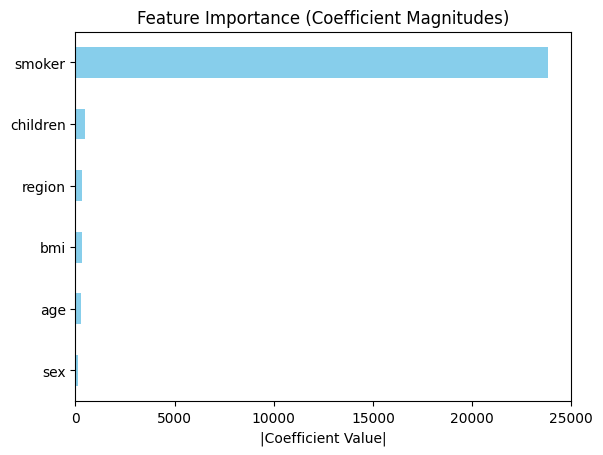

In [39]:
coef = pd.Series(theta_multi[1:].flatten(), index=['age','bmi','children','sex','smoker','region'])
coef.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Coefficient Magnitudes)")
plt.xlabel("|Coefficient Value|")

The coefficient magnitude plot reveals that smoking status is the primary determinant of insurance charges, overshadowing all other factors.
Age, BMI, and number of children exert smaller positive effects, while region and sex appear almost neutral.
From a business standpoint, this insight supports risk-based pricing, preventive health initiatives, and targeted awareness programs focused on smoking-related costs.